In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
import plotly.graph_objects as go


In [2]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data_position.xlsx"

df = pd.read_excel(path_file, sheet_name='yaw0pitch0roll0')

# print(df1)

<>:1: SyntaxWarning:

invalid escape sequence '\P'

<>:1: SyntaxWarning:

invalid escape sequence '\P'

C:\Users\Quan\AppData\Local\Temp\ipykernel_548\1823208935.py:1: SyntaxWarning:

invalid escape sequence '\P'



In [3]:
x_calculated = df.loc[:, 'x1']
y_calculated = df.loc[:, 'y1']
z_calculated = df.loc[:, 'z1']
x_samples = df.loc[:, 'X1']
y_samples = df.loc[:, 'Y1']
z_samples = df.loc[:, 'Z1']
# print(z_calculated)


delta_xy = df.loc[:, 'delta_xy1']
delta_xyz = df.loc[:, 'delta_xyz1']



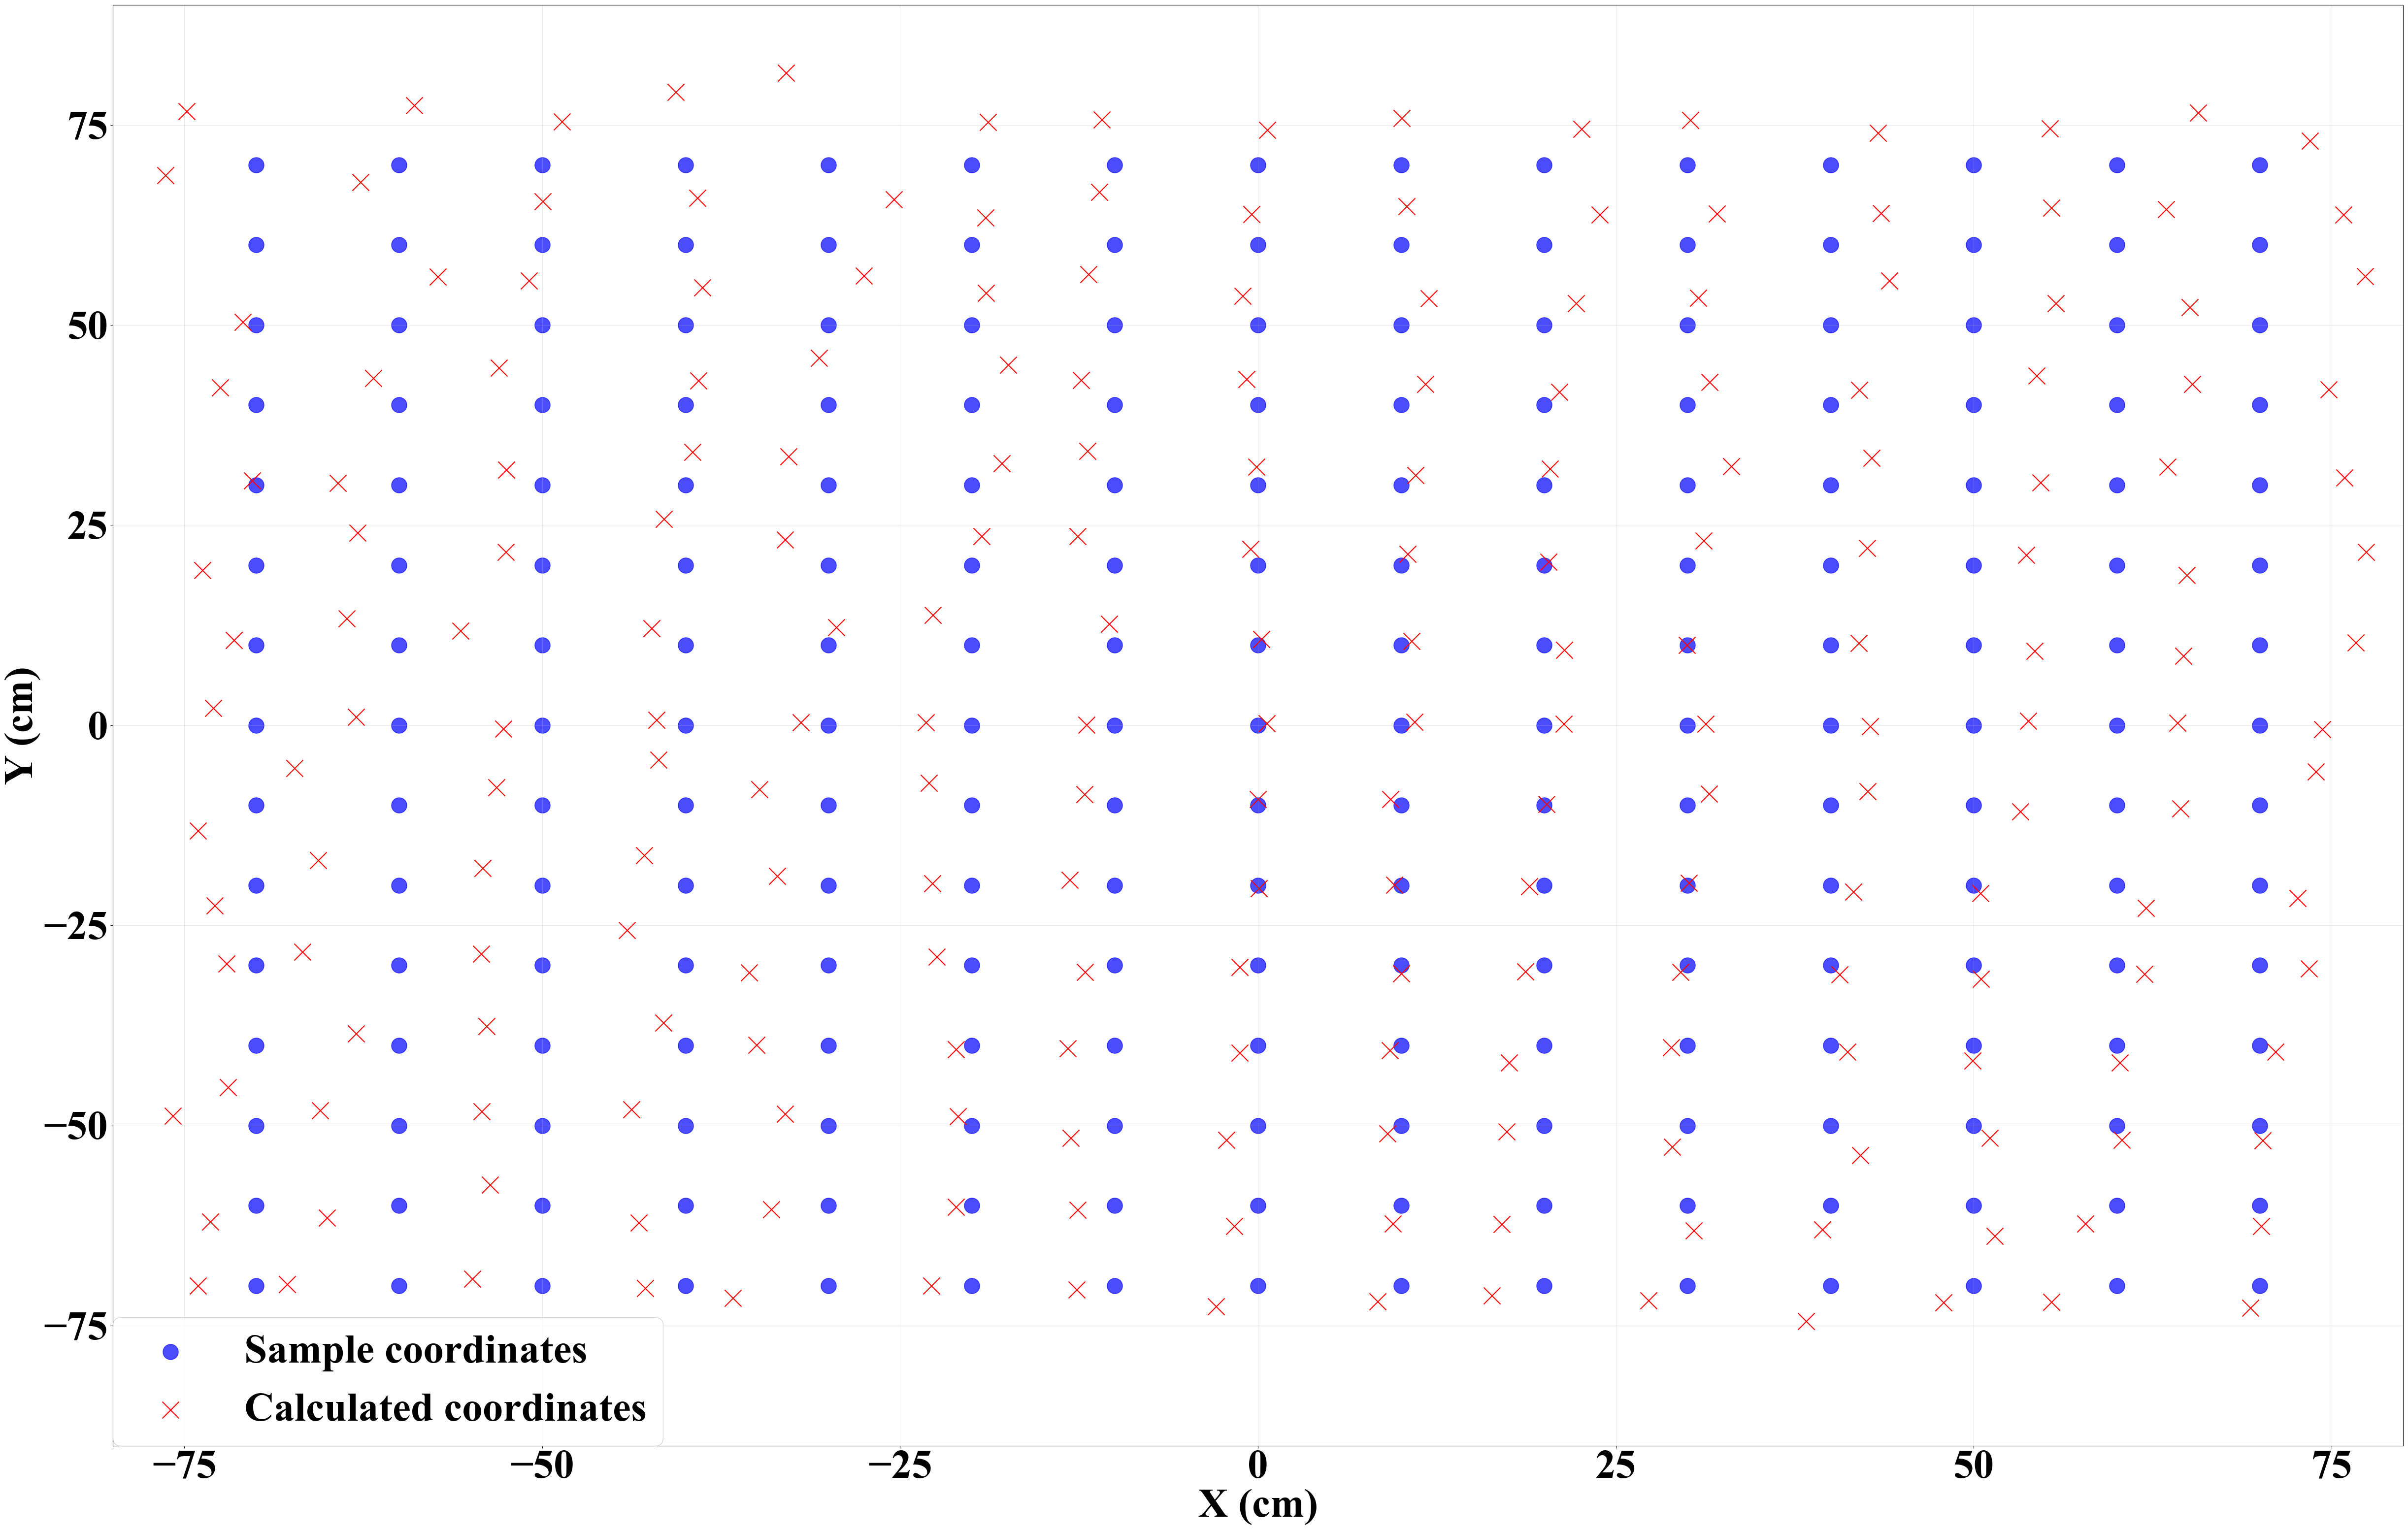

In [21]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(60, 38))
ax = plt.gca()
ax.scatter(x_samples, y_samples, c='b', marker='o',s=500, label='Sample coordinates', alpha =0.7)
ax.scatter(x_calculated, y_calculated, c= 'r', marker='x',s=600, label='Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize=60)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize=60)

ax.legend(loc=(0, 0), fontsize=60)

ax.set_xticks([-75, -50, -25, 0, 25, 50, 75])
ax.set_yticks([-75, -50, -25, 0, 25, 50, 75])

ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', labelsize=60)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=60)  # Kích thước chữ cho trục Y

# Set axis limits to match the example
ax.set_xlim(-80, 80)
ax.set_ylim(-90, 90)
plt.savefig('img/c1_2D', dpi = 400, bbox_inches='tight') 

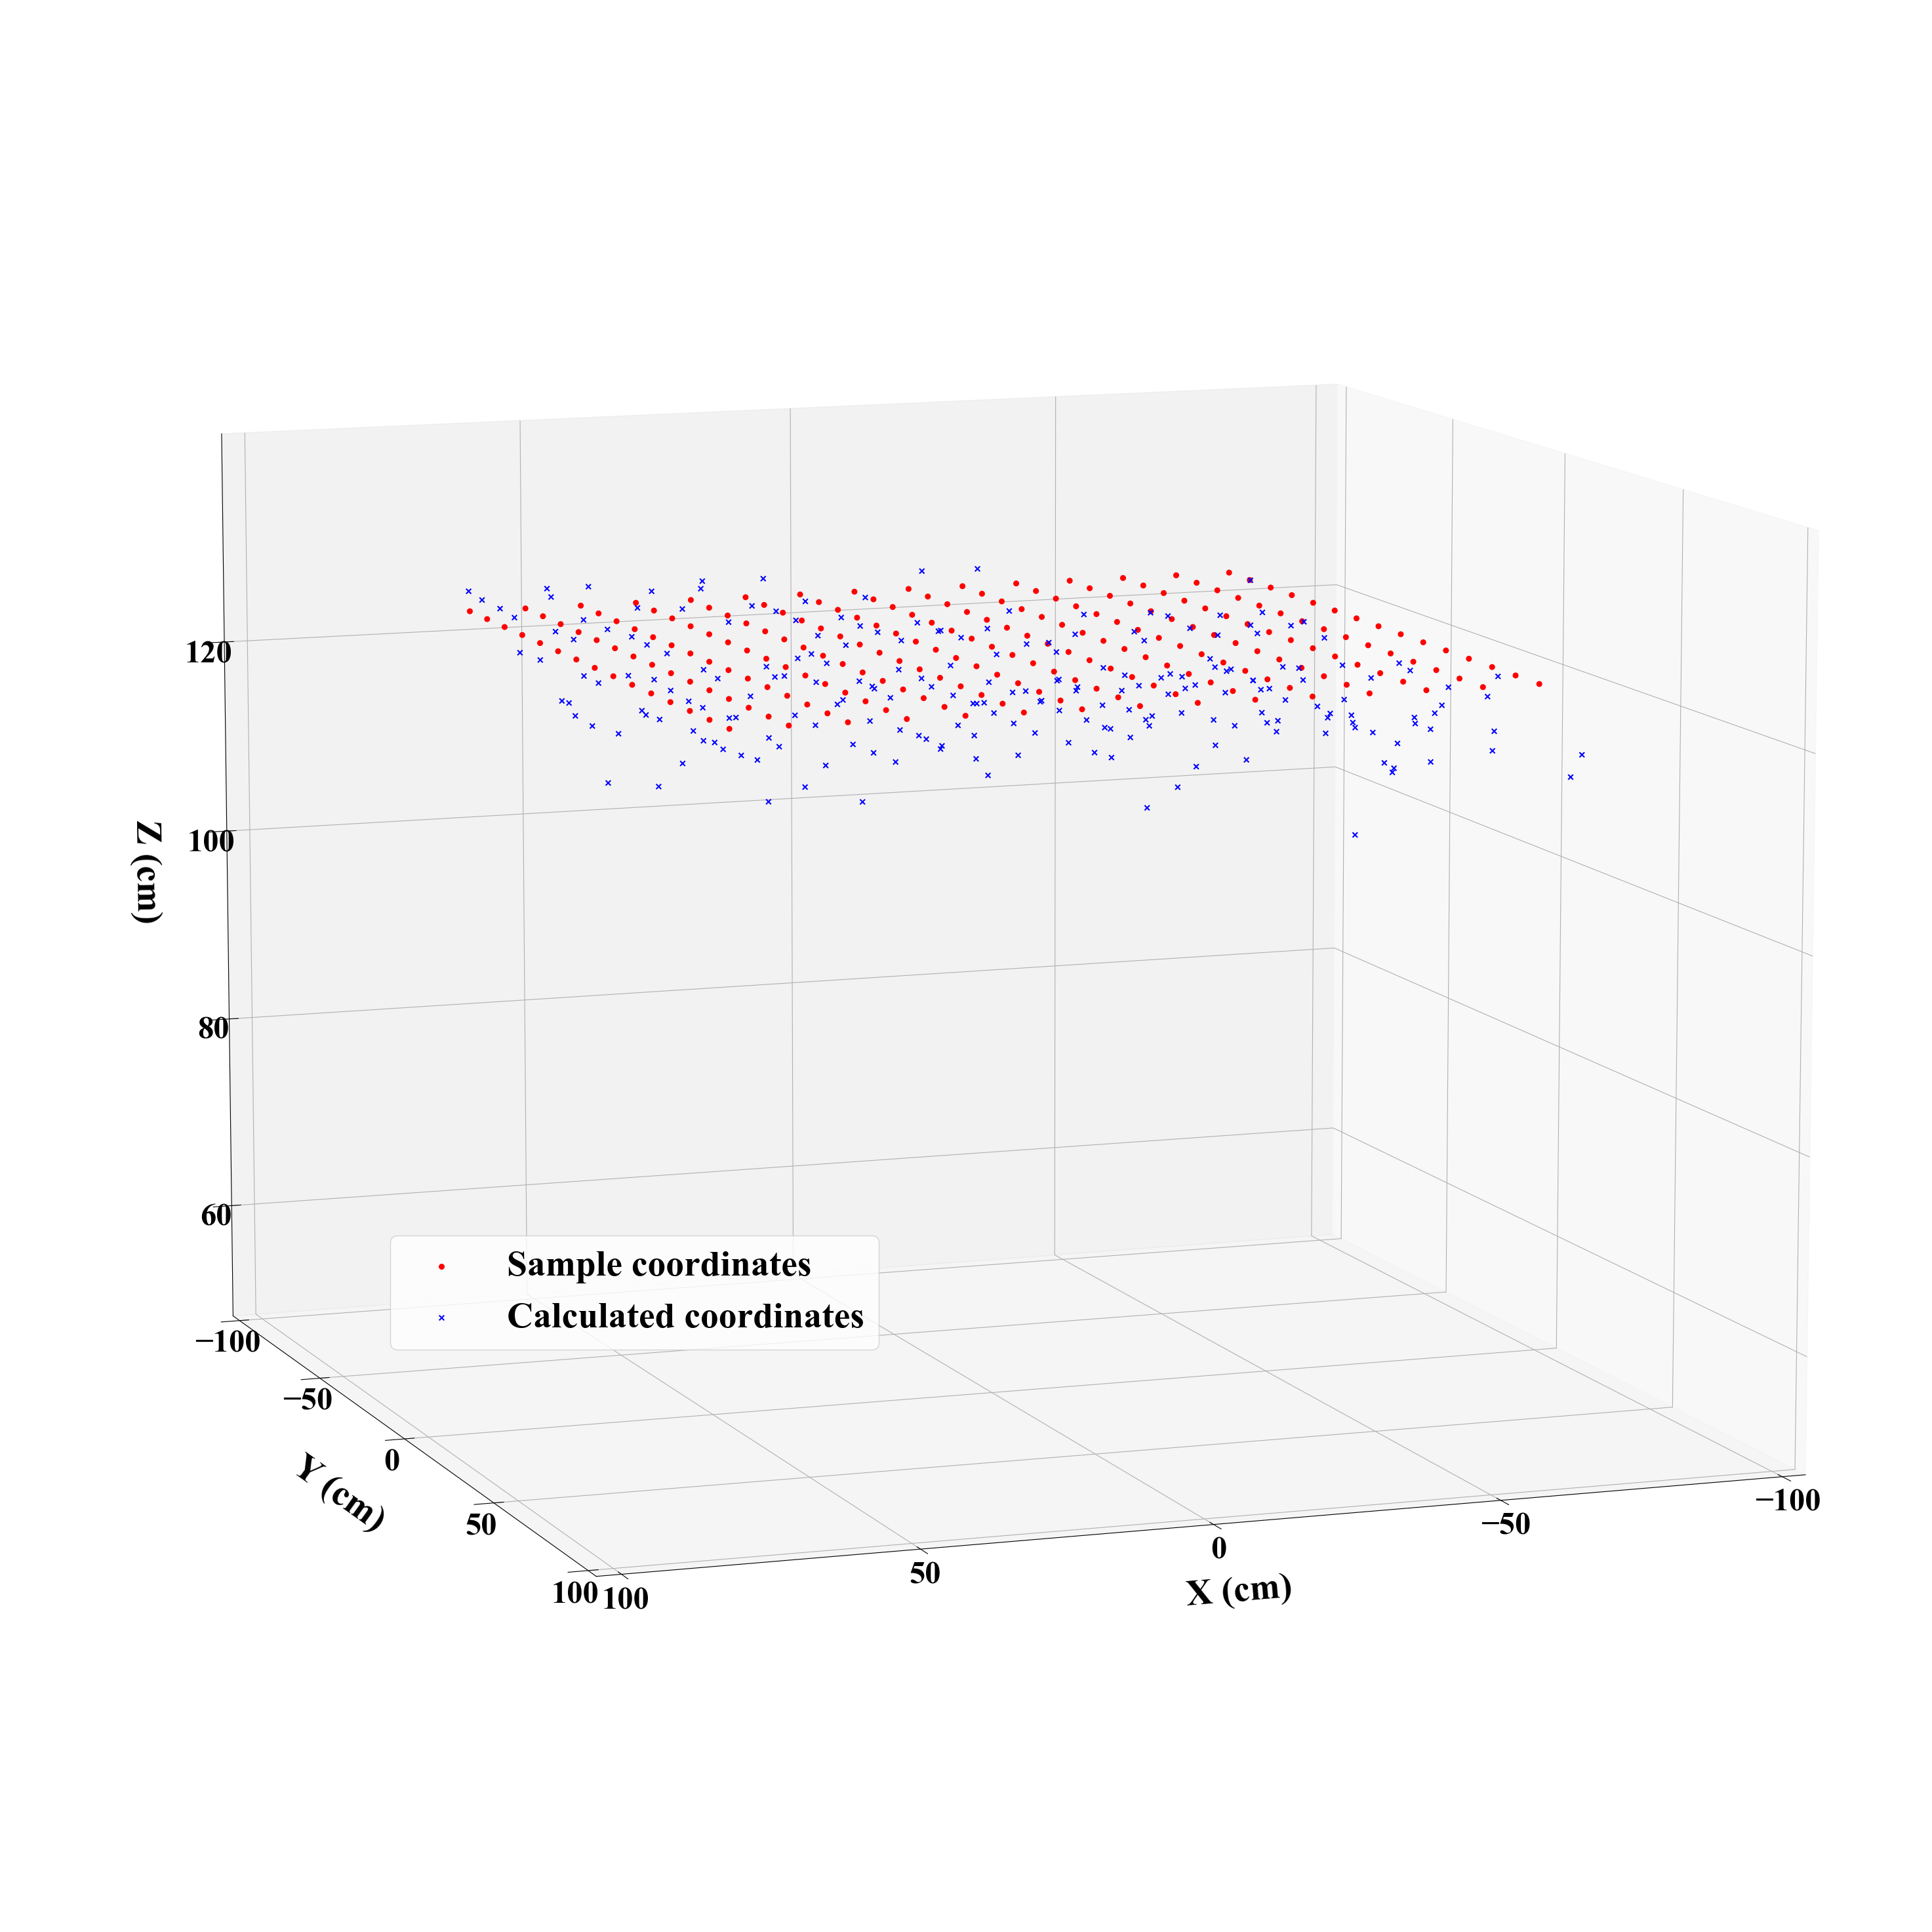

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

fig = plt.figure(figsize=(62, 38))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='r', marker='o', s= 30, label = 'Sample coordinates', alpha = 1)
ax.scatter(x_calculated, y_calculated, z_calculated, c='b', marker='x', s= 30, label = 'Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize = 40, labelpad=40)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize = 40, labelpad=40)
ax.set_zlabel('Z (cm)', fontdict={'weight': 'bold'}, fontsize = 40, labelpad=40)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(50, 140)
ax.grid(True)
ax.legend(loc=(0.2, 0.3), fontsize = 40)

# Adjust view angle
ax.view_init(elev=10, azim=70)

ax.set_xticks([-100, -50, 0, 50, 100])
ax.set_yticks([-100, -50, 0, 50, 100])
ax.set_zticks([ 60, 80, 100, 120])
ax.tick_params(axis='x', labelsize=35)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=35)  # Kích thước chữ cho trục Y
ax.tick_params(axis='z', labelsize=35)  # Kích thước chữ cho trục Z

# Remove top and right spines
# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
plt.show()
fig.savefig('img/c1_3D', dpi = 300, bbox_inches='tight') 

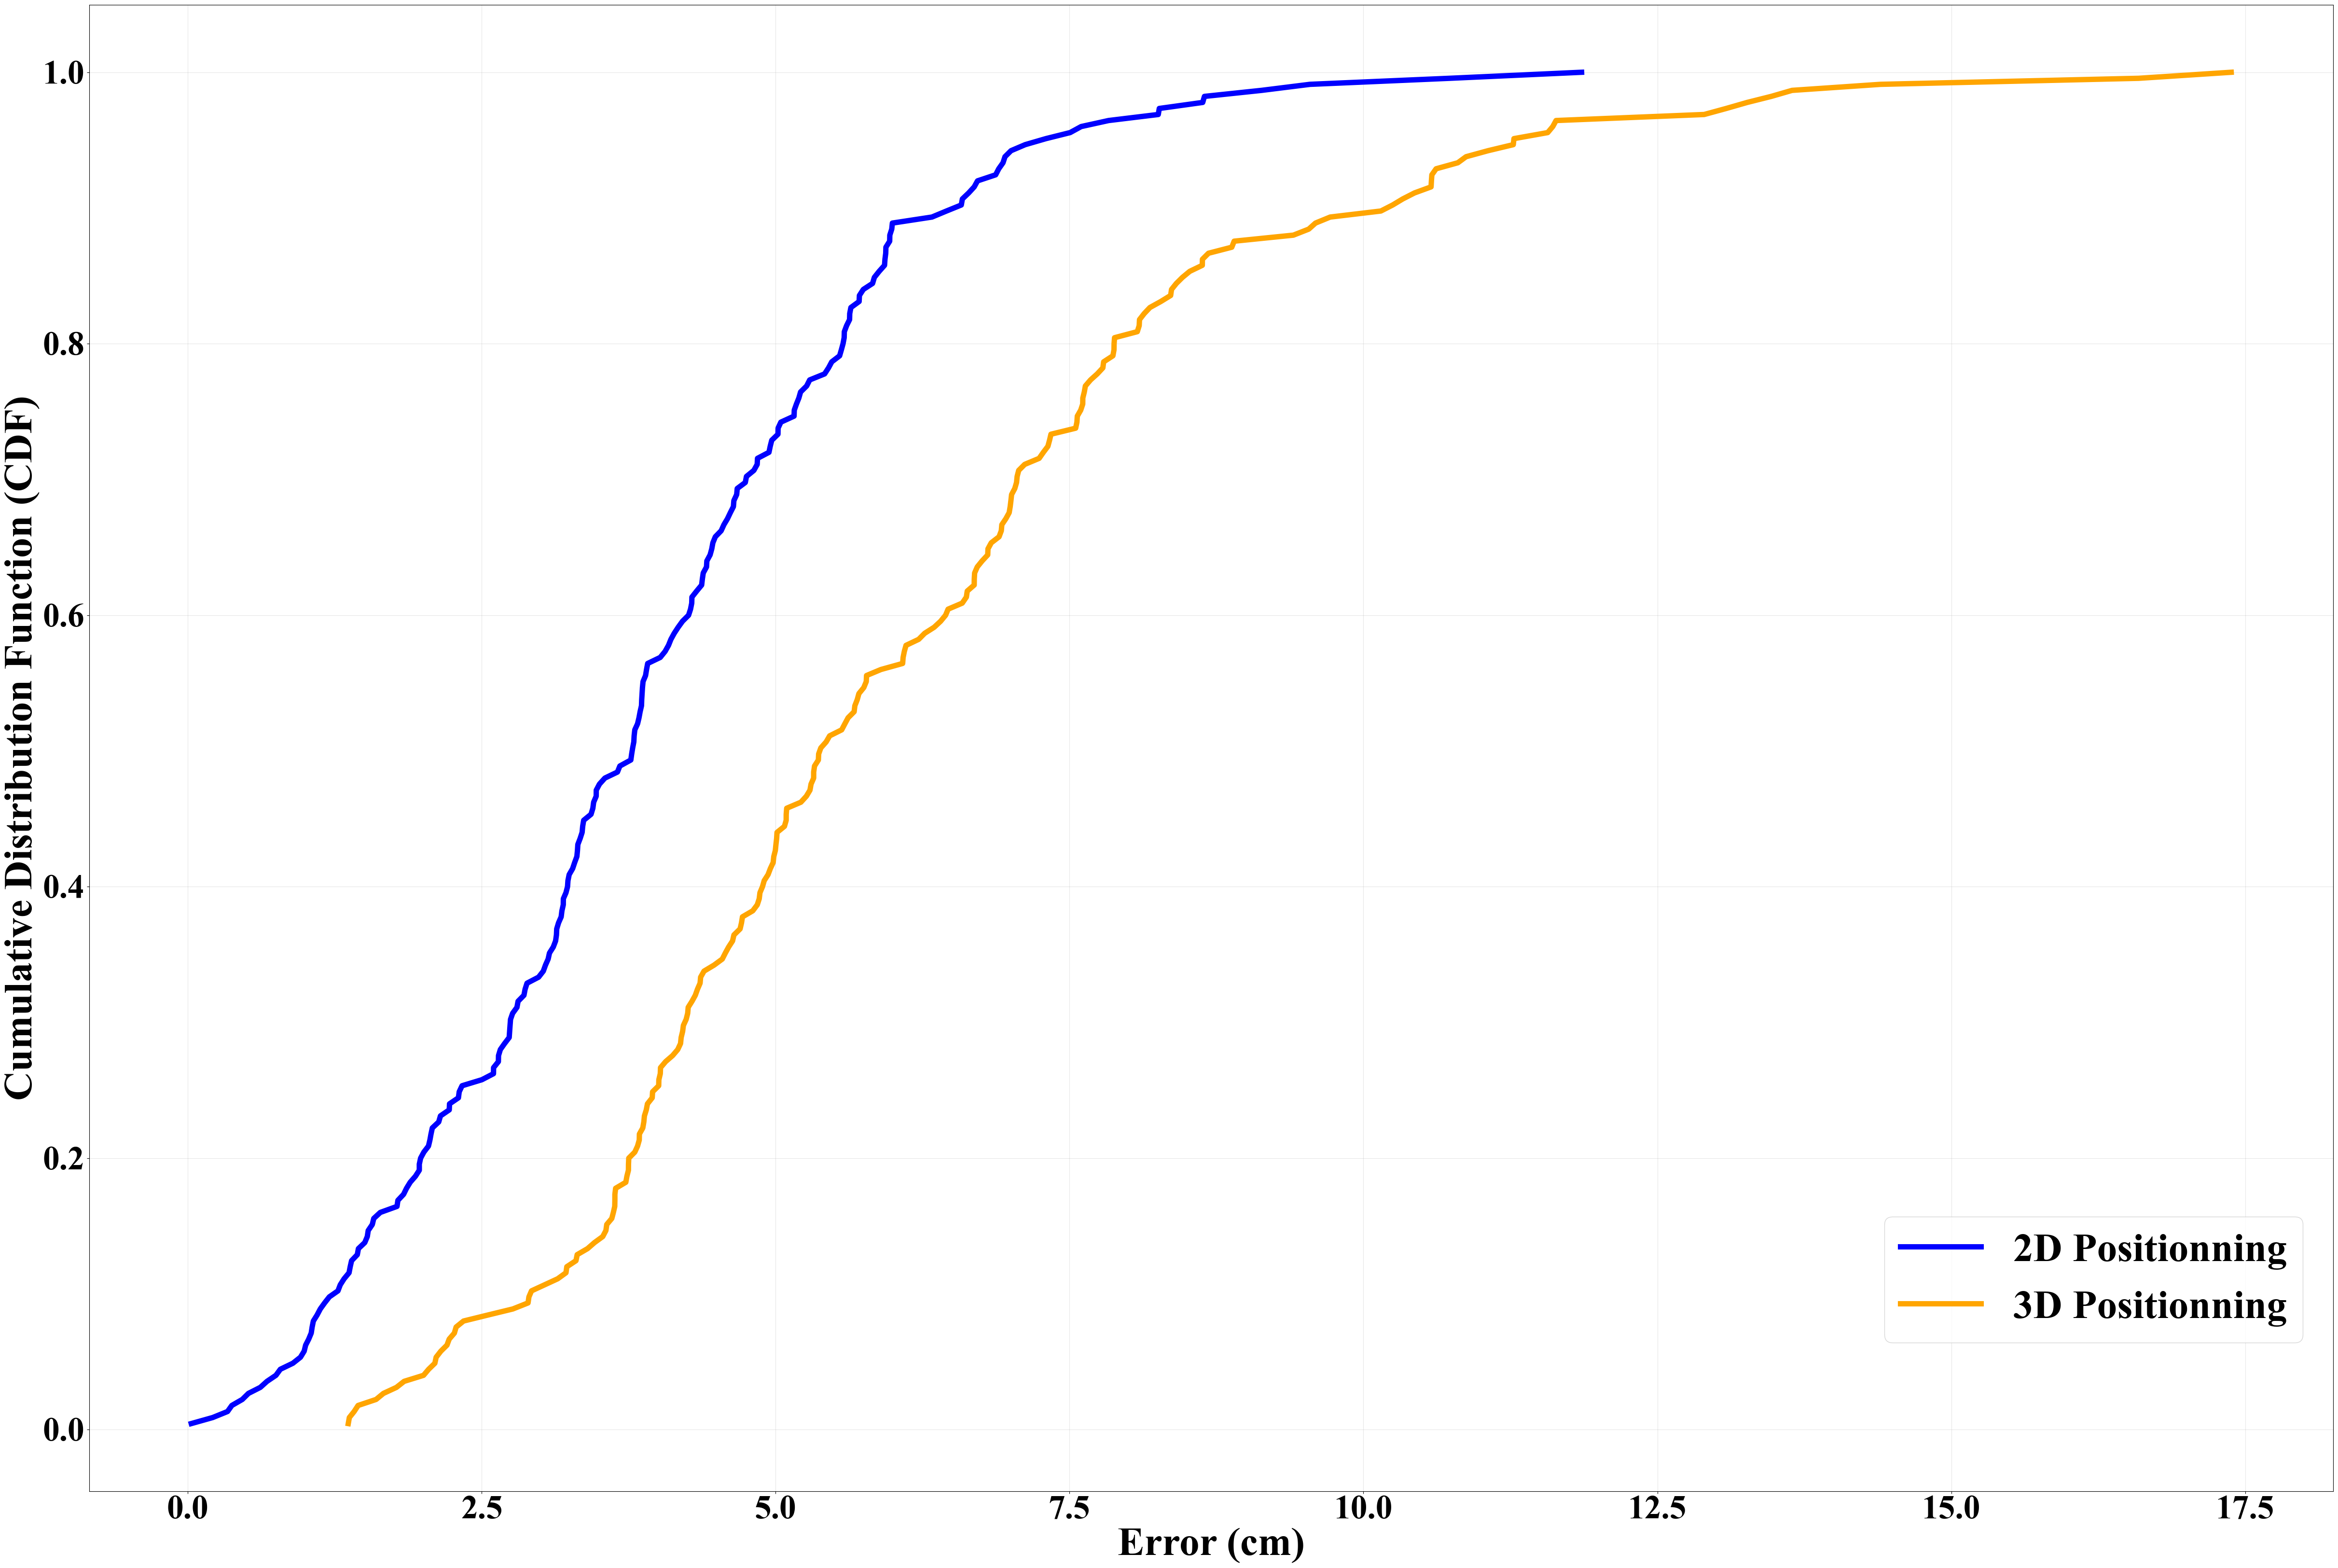

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# print(delta_xy)
data_sorted = np.sort(delta_xy)
data_xyz_sorted = np.sort(delta_xyz)


# print(data_sorted)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)
cdf2 = np.arange(1, len(data_xyz_sorted) + 1) / len(data_xyz_sorted)


# Vẽ biểu đồ CDF
plt.figure(figsize=(60, 40))
ax = plt.gca()


# Vẽ CDF
ax.plot(data_sorted, cdf, linestyle='-', color='blue', linewidth = 8, label = '2D Positionning')

ax.plot(data_xyz_sorted, cdf2, linestyle='-', color='orange', linewidth = 8, label = '3D Positionning')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Error (cm)', fontdict={'weight': 'bold'}, fontsize = 60)
ax.set_ylabel('Cumulative Distribution Function (CDF)', fontdict={'weight': 'bold'}, fontsize = 60)

ax.legend(loc = (0.8, 0.1), fontsize = 60)
# Hiển thị lưới
ax.grid(True, alpha=0.3)


ax.tick_params(axis='x', labelsize=50)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=50)  # Kích thước chữ cho trục Y

plt.savefig('img/c1_CDF',dpi = 400,bbox_inches='tight')
